# 1. Load Library

In [1]:
!pip install pyreadstat
!pip install pingouin
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.1 MB/s eta 0:00:00


In [2]:
from datetime import datetime
import io
import pandas as pd
import pyreadstat
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency,zscore,ttest_1samp,ttest_ind,levene,kstest,mannwhitneyu,ttest_rel,norm,rankdata,kruskal,pearsonr,spearmanr
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd,MultiComparison
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.libqsturng import psturng
import statsmodels.api as sm
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import gspread
from gspread_dataframe import set_with_dataframe
from google.oauth2.service_account import Credentials
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import drive
drive.mount('/content/drive')
import xlsxwriter
from openpyxl.drawing.image import Image

Mounted at /content/drive


# 2. Load Scope Spreadsheets

# 3. Read Data

In [4]:
# File path to your .sav file
file_path = "/content/drive/My Drive/Data Analytics/SPSS Book/Data SPSS/Data thuc hanh.csv"

# Read the SPSS file
df = pd.read_csv(file_path)
# df, meta = pyreadstat.read_sav(file_path)

# Display the first few rows and column information
df.head(),df.info(),df.describe()

# Capture the output of df.info()
buffer_info = io.StringIO()
df.info(buf=buffer_info)
info_str = buffer_info.getvalue()

# Capture the output of df.describe()
describe_df = df.describe()

# Save to Excel
with pd.ExcelWriter('info_describe.xlsx') as writer:
  # Write df.info() to the first sheet
  pd.DataFrame({'Info': info_str.split('\n')}).to_excel(writer, sheet_name='Info', index=False)

  # Write df.describe() to the second sheet
  describe_df.to_excel(writer, sheet_name='Describe')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 153 entries, stt to hocvan4n
dtypes: float64(1), int64(44), object(108)
memory usage: 597.8+ KB


# 4. Data Wrangling

In [5]:
# Convert these columns to numeric
columns_to_convert = ['c2a1', 'c2a2', 'c2a3', 'c2a4', 'c2a5', 'c2a6', 'c2a7', 'c2a8', 'c2a9', 'c2b1', 'c2b2', 'c2b3', 'c2c1', 'c2c2', 'c2c3', 'c2c4', 'c2c5', 'c2c6', 'c2d2', 'c2d3', 'c2d4', 'c2d5', 'c2d6', 'c4.2', 'c5.2', 'c8', 'c10', 'c11.1', 'c11.2', 'c12', 'c13', 'c14', 'c15', 'c16.1', 'c16.2', 'c16.3', 'c16.4', 'c16.5', 'c16.6', 'c16.7', 'c16.8', 'c16.9', 'c16.10', 'c16.11', 'c17.1', 'c17.2', 'c17.3', 'c17.4', 'c17.5', 'c18', 'c19.1', 'c19.2', 'c19.3', 'c20.1', 'c20.2', 'c20.3', 'c21', 'c22.1', 'c22.2', 'c22.3', 'c23a', 'c23b', 'c24a', 'c24b', 'c25', 'c26.1', 'c26.2', 'c26.3', 'c27', 'c28', 'c30a1', 'c30a2', 'c30a3', 'c30a4', 'c30a5', 'c30b1', 'c30b2', 'c30b3', 'c30b4', 'c30c1', 'c30c2', 'c30c3', 'c30c4', 'c30c5', 'c30d1', 'c30d2', 'c31.1', 'c31.2', 'c32.a1', 'c32.a2', 'c32.a3', 'c32.b1', 'c32.b2', 'c32.b3', 'c33.1', 'c33.2', 'c33.3', 'c34.1', 'c34.2', 'c34.3', 'c35.1', 'c35.2', 'c35.3', 'c36.8', 'c37.2', 'c37.3', 'c37.4', 'c37.5']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# 5. Data Encryption
Convert all dimension to value

# 6. Descriptive Statistics
This provides:
-	Mean, standard deviation, min, 25th percentile, median (50th), 75th percentile, and max for numerical data.
-	Unique, top, and frequency for categorical data.

In [6]:
# Summary statistics
basic_stats = df.describe(include='all')

# Transpose for better readability
descriptive_statistics = basic_stats.T

descriptive_statistics.to_excel('descriptive_statistics.xlsx', sheet_name='Descriptive Statistics', index=True)

# 7. Inferential Statistics

# 7.1 Pearson Chi-Square
2 biến định tính

Kiểm định mỗi liên hệ giữa hai biến định tính. df['hocvan'] - Trình độ học vấn, df['c6.1'] - Cách đọc tờ báo (đọc từ đầu đến cuối, đọc lướt các mục, chỉ đọc mục hoặc trang ưu thích, xem các tin đáng chú ý)

In [7]:
# Input the clolumns & Significance level
x = df['hocvan4n']
y = df['c6.1']
alpha = 0.05

In [8]:
# Create a detailed Case Processing Summary table
case_processing_summary = pd.DataFrame({
  'Total': [len(x)],
  'Missing Cases': [x.isnull().count()],
  'Valid': [len(x) - x.isnull().count()]
})

# Create a Crosstabulation table with additional percentage information
crosstab_with_totals = pd.crosstab(x, y, margins=True)
crosstab_with_percent = pd.crosstab(x, y, margins=True, normalize='all')*100

# Combine both into a multi-level DataFrame
crosstab_combined = pd.concat(
    {'User': crosstab_with_totals, 'Percent_User': crosstab_with_percent},
    axis=1
)

# Perform the Chi-Square test and create a table with the results
crosstab = pd.crosstab(x, y)

# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(crosstab)
chi_square_results = {
  'Chi2': chi2,
  'p-value': p,
  'Degrees of Freedom': dof,
  'Expected Frequencies': expected
}

chi_square_results_df = pd.DataFrame({
  'Chi2': [chi_square_results['Chi2']],
  'p-value': [chi_square_results['p-value']],
  'Degrees of Freedom': [chi_square_results['Degrees of Freedom']],
  'Expected Frequencies': [chi_square_results['Expected Frequencies']]
})
print('Pearson Chi-Square Results:')
print(chi_square_results_df)

# Test the p-value
if p < alpha:
  hypothesis_testing = pd.DataFrame({
    'Result': [f'Reject the null hypothesis (p-value <= {alpha}). There is a significant difference between the means of the two groups.']
  })
  print(f'Reject the null hypothesis (p-value <= {alpha}). There is a significant difference between the means of the two groups.')
else:
  hypothesis_testing = pd.DataFrame({
    'Result': ['Fail to reject the null hypothesis (p-value > {alpha}). There is no significant difference between the means of the two groups.']
  })
  print(f'Fail to reject the null hypothesis (p-value > {alpha}). There is no significant difference between the means of the two groups.')

# Save all the tables into a single CSV file
with pd.ExcelWriter('chi_square_test_results.xlsx') as writer:
  case_processing_summary.to_excel(writer, sheet_name='Case Processing Summary', index=False)
  crosstab_combined.to_excel(writer, sheet_name='Crosstabulation')
  chi_square_results_df.to_excel(writer, sheet_name='Chi-Square Test Results', index=False)
  hypothesis_testing.to_excel(writer, sheet_name='Hypothesis Testing Results', index=False)

print('Read file chi_square_test_results.xlsx')

Pearson Chi-Square Results:
        Chi2  p-value  Degrees of Freedom  \
0  20.237762   0.0165                   9   

                                Expected Frequencies  
0  [[17.76, 30.24, 5.52, 6.48], [63.64, 108.36, 1...  
Reject the null hypothesis (p-value <= 0.05). There is a significant difference between the means of the two groups.
Read file chi_square_test_results.xlsx


# 7.2 One-Sample T-test
1 biến định lượng, 1 biến định tính. So sánh trung bình của một tổng thể với một giá trị cụ thể nào đó. VD: Kiểm định tuổi trung bình của độc giả báo Sài Gòn tiếp thị (SGTT) là 30 tuổi

In [9]:
# List of user read Sai Gon Tiep Thi newspaper or not
df['docSGTT'] = (df[['c2a1', 'c2a2', 'c2a3', 'c2a4', 'c2a5', 'c2a6', 'c2a7', 'c2a8', 'c2a9']] == 12).any(axis=1).astype(int)

docSGTT_counts = df['docSGTT'].value_counts()
print(docSGTT_counts)

# Filter the DataFrame to only include users who read Sai Gon Tiep Thi
df_docSGTT = df.loc[df['docSGTT'] == 1, ['docSGTT', 'tuoi']]
print(df_docSGTT.describe())

docSGTT
0    341
1    159
Name: count, dtype: int64
       docSGTT        tuoi
count    159.0  159.000000
mean       1.0   32.786164
std        0.0   10.328383
min        1.0   18.000000
25%        1.0   24.000000
50%        1.0   31.000000
75%        1.0   40.000000
max        1.0   59.000000


<ipython-input-9-5ace0e4cbaef>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['docSGTT'] = (df[['c2a1', 'c2a2', 'c2a3', 'c2a4', 'c2a5', 'c2a6', 'c2a7', 'c2a8', 'c2a9']] == 12).any(axis=1).astype(int)


In [10]:
# Input Test value
table = df_docSGTT
x = table['tuoi']
test_value = 30
confidence_interval = 0.95
alpha = round(1 - confidence_interval,3)
z_value = norm.ppf((1 + confidence_interval) / 2)

In [11]:
# Perform one-sample T-test
t_stat, p_value = ttest_1samp(x, test_value)

# Create the one-sample statistics table
one_sample_statistics = pd.DataFrame({
  'N': [x.count()],
  'Mean': [x.mean()],
  'Std. Deviation': [x.std()],
  'Std. Error Mean': [x.sem()]
})

# Create the one-sample test table
one_sample_test = pd.DataFrame({
  'Test Value': [test_value],
  't': [t_stat],
  'df': [len(table) - 1],
  'Sig. (2-tailed)': [p_value],
  'Mean Difference': [x.mean() - test_value],
  f'{round(confidence_interval*100,0)}% Confidence Interval of the Difference (Lower)': [x.mean() - test_value - z_value * x.sem()],
  f'{round(confidence_interval*100,0)}% Confidence Interval of the Difference (Upper)': [x.mean() - test_value + z_value * x.sem()]
})
print('One-sample T-test results:')
print(one_sample_test)

# Test the p-value
if p_value < alpha:
  hypothesis_testing = pd.DataFrame({
    'Result': [f'Reject the null hypothesis (p-value <= {alpha}). There is a significant difference between the means of the two groups. Mean Difference = {x.mean() - test_value}']
  })
  print(f'Reject the null hypothesis (p-value <= {alpha}). There is a significant difference between the means of the two groups. Mean Difference = {x.mean() - test_value}')
else:
  hypothesis_testing = pd.DataFrame({
    'Result': [f'Fail to reject the null hypothesis (p-value > {alpha}). There is no significant difference between the means of the two groups.']
  })
  print(f'Fail to reject the null hypothesis (p-value > {alpha}). There is no significant difference between the means of the two groups.')

# Save the results to an Excel file
with pd.ExcelWriter('one_sample_t_test_results.xlsx') as writer:
  one_sample_statistics.to_excel(writer, sheet_name='One-Sample Statistics', index=False)
  one_sample_test.to_excel(writer, sheet_name='One-Sample Test', index=False)
  hypothesis_testing.to_excel(writer, sheet_name='Hypothesis Testing Results', index=False)

print('Read file one_sample_t_test_results.xlsx')

One-sample T-test results:
   Test Value         t   df  Sig. (2-tailed)  Mean Difference  \
0          30  3.401518  158         0.000849         2.786164   

   95.0% Confidence Interval of the Difference (Lower)  \
0                                           1.180769     

   95.0% Confidence Interval of the Difference (Upper)  
0                                           4.391558    
Reject the null hypothesis (p-value <= 0.05). There is a significant difference between the means of the two groups. Mean Difference = 2.786163522012579
Read file one_sample_t_test_results.xlsx


# 7.3 Independent-sample T-test
1 biến định tính, 1 biến định lượng. So sánh trị trung bình của 2 nhóm tổng thể riêng biệt trong biến định tính.

Kiểm định biến định lượng sonk - số nhân khẩu 1 gia đình và biến định tính tp - Thành Phố. So sánh giữa Hà Nội - 1 và TP HCM -2 về số nhân khẩu trung bình của hộ gia đình

In [12]:
# Filter the DataFrame to only include rows where 'tp' is 1 or 2
filtered_df = df[df['tp'].isin([1, 2])][['tp', 'sonk']]

filtered_df_count_tp = filtered_df['tp'].value_counts()
filtered_df_sum_sonk = filtered_df.groupby('tp').agg(
  sum_sonk = ('sonk', 'sum')
)
print(filtered_df_count_tp,filtered_df_sum_sonk)

tp
1    250
2    250
Name: count, dtype: int64     sum_sonk
tp          
1       1073
2       1332


**Input Test Value**

In [13]:
# Input Test value
table = filtered_df
confidence_interval = 0.95
alpha = round(1 - confidence_interval,3)
z_value = norm.ppf((1 + confidence_interval) / 2)
group1 = table[table['tp'] == 1]['sonk']
group2 = table[table['tp'] == 2]['sonk']
x = table['sonk'] #quantitative data
y = table['tp'] #qualitative data

**Kolmogorov-Smirnow test to see if the data is normally distributed:**
- If the data is normal distribution, use Independent Samples T-Test.
- If the data is not normal distribution, use Mann-Whitney test.

In [14]:
# Chuẩn hóa dữ liệu
group1_standardized = (group1 - np.mean(group1)) / np.std(group1)
group2_standardized = (group2 - np.mean(group2)) / np.std(group2)

# Kiểm định KS cho từng nhóm
ks_stat1, p_value1 = kstest(group1_standardized, 'norm')
ks_stat2, p_value2 = kstest(group2_standardized, 'norm')

print(f"KS Test Group 1: Statistic={ks_stat1}, p-value={p_value1}")
print(f"KS Test Group 2: Statistic={ks_stat2}, p-value={p_value2}")

# Kiểm tra kết quả kiểm định
if p_value1 > alpha and p_value2 > alpha:
    result = 'Cả hai nhóm đều tuân theo phân phối chuẩn. Tiến hành kiểm định t-test.'
    print('Cả hai nhóm đều tuân theo phân phối chuẩn. Tiến hành kiểm định t-test.')
else:
    result = 'Dữ liệu không tuân theo phân phối chuẩn. Cân nhắc sử dụng kiểm định phi tham số (Mann-Whitney U test).'
    print('Dữ liệu không tuân theo phân phối chuẩn. Cân nhắc sử dụng kiểm định phi tham số (Mann-Whitney U test).')

# Create the Kolmogorov-Smirnov test results table
ks_test_results = pd.DataFrame({
  'KS Test Group 1': [f'Statistic={ks_stat1}, p-value={p_value1}'],
  'KS Test Group 2': [f'Statistic={ks_stat2}, p-value={p_value2}'],
  'result': [result]
})

# Save the results to an Excel file
ks_test_results.to_excel('independent_samples_t_test_ks_test_results.xlsx', sheet_name='KS Test Results', index=False)

print('Read file independent_samples_t_test_ks_test_results.xlsx')

KS Test Group 1: Statistic=0.24967596416601523, p-value=3.230345282824065e-14
KS Test Group 2: Statistic=0.17405455408295412, p-value=4.2917647813174387e-07
Dữ liệu không tuân theo phân phối chuẩn. Cân nhắc sử dụng kiểm định phi tham số (Mann-Whitney U test).
Read file independent_samples_t_test_ks_test_results.xlsx


**Independent Samples T-Test**

In [15]:
# Calculate group statistics
group_statistics = pd.DataFrame({
  'Group': ['1', '2'],
  'N': [group1.count(), group2.count()],
  'Mean': [group1.mean(), group2.mean()],
  'Std. Deviation': [group1.std(), group2.std()],
  'Std. Error Mean': [group1.sem(), group2.sem()]
})
print('Group Statistics:')
print(group_statistics)

# Perform Levene's Test for Equality of Variances
levene_stat, levene_p = levene(group1, group2)

# Perform t-test for Equality of Means
t_stat, p_value = ttest_ind(group1, group2, equal_var=True)
t_stat_welch, p_value_welch = ttest_ind(group1, group2, equal_var=False)

# Calculate confidence intervals
ci_lower = group1.mean() - group2.mean() - z_value * (group1.sem() + group2.sem())
ci_upper = group1.mean() - group2.mean() + z_value * (group1.sem() + group2.sem())

# Create the independent samples test table
independent_samples_test = pd.DataFrame({
  'Test': ['Levene\'s Test for Equality of Variances', 't-test for Equality of Means', 't-test for Equality of Means (Welch)'],
  'Statistic': [levene_stat, t_stat, t_stat_welch],
  'df': [len(group1) + len(group2) - 2, len(group1) + len(group2) - 2, len(group1) + len(group2) - 2],
  'Sig. (2-tailed)': [levene_p, p_value, p_value_welch],
  'Mean Difference': [None, group1.mean() - group2.mean(), group1.mean() - group2.mean()],
  f'{round(confidence_interval*100,1)}% Confidence Interval of the Difference (Lower)': [None, ci_lower, ci_lower],
  f'{round(confidence_interval*100,1)}% Confidence Interval of the Difference (Upper)': [None, ci_upper, ci_upper]
})
print('Independent Samples T-Test Results:')
print(independent_samples_test)

# Test the p-value
if levene_p < alpha and p_value_welch < alpha:
  hypothesis_testing = pd.DataFrame({
    'Result': [f'Reject the null hypothesis (p-value <= {alpha}). There is a significant difference between the means of the two groups. Mean Difference: {group1.mean() - group2.mean()}']
  })
  print(f'Reject the null hypothesis (p-value <= {alpha}). There is a significant difference between the means of the two groups. Mean Difference: {group1.mean() - group2.mean()}')
elif levene_p < alpha and p_value_welch >= alpha:
  hypothesis_testing = pd.DataFrame({
    'Result': [f'Fail to reject the null hypothesis (p-value > {alpha}). There is no significant difference between the means of the two groups.']
  })
  print(f'Fail to reject the null hypothesis (p-value > {alpha}). There is no significant difference between the means of the two groups.')
elif levene_p >= alpha and p_value < alpha:
  hypothesis_testing = pd.DataFrame({
    'Result': [f'Reject the null hypothesis (p-value <= {alpha}). There is a significant difference between the means of the two groups. Mean Difference: {group1.mean() - group2.mean()}']
  })
  print(f'Reject the null hypothesis (p-value <= {alpha}). There is a significant difference between the means of the two groups. Mean Difference: {group1.mean() - group2.mean()}')
else:
  hypothesis_testing = pd.DataFrame({
    'Result': [f'Fail to reject the null hypothesis (p-value > {alpha}). There is no significant difference between the means of the two groups.']
  })
  print(f'Fail to reject the null hypothesis (p-value > {alpha}). There is no significant difference between the means of the two groups.')

# Save the results to an Excel file
with pd.ExcelWriter('independent_samples_t_test_results.xlsx') as writer:
  group_statistics.to_excel(writer, sheet_name='Group Statistics', index=False)
  independent_samples_test.to_excel(writer, sheet_name='Independent Samples T-Test', index=False)
  hypothesis_testing.to_excel(writer, sheet_name='Hypothesis Testing Results', index=False)

print('Read file independent_samples_t_test_results.xlsx')

Group Statistics:
  Group    N   Mean  Std. Deviation  Std. Error Mean
0     1  250  4.292        1.666688         0.105411
1     2  250  5.328        2.714755         0.171696
Independent Samples T-Test Results:
                                      Test  Statistic   df  Sig. (2-tailed)  \
0  Levene's Test for Equality of Variances  31.409280  498     3.464659e-08   
1             t-test for Equality of Means  -5.142153  498     3.910663e-07   
2     t-test for Equality of Means (Welch)  -5.142153  498     4.201224e-07   

   Mean Difference  95.0% Confidence Interval of the Difference (Lower)  \
0              NaN                                                NaN     
1           -1.036                                          -1.579119     
2           -1.036                                          -1.579119     

   95.0% Confidence Interval of the Difference (Upper)  
0                                                NaN    
1                                          -0.492881   

**Mann-Whitney Test**

In [16]:
# Perform the Mann-Whitney U test
u_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

# Create the ranks table
ranks = pd.DataFrame({
  'Group': ['1', '2'],
  'N': [len(group1), len(group2)],
  'Mean Rank': [group1.rank().mean(), group2.rank().mean()],
  'Sum of Ranks': [group1.rank().sum(), group2.rank().sum()]
})
print('Group Statistics:')
print(ranks)

# Create the test statistics table
test_statistics = pd.DataFrame({
  'U Statistic': [u_stat],
  'p-value': [p_value],
  'alpha': [alpha],
  'Result': [f'Reject the null hypothesis (p-value <= {alpha})' if p_value <= alpha else f'Fail to reject the null hypothesis (p-value > {alpha})']
})
print('Mann-Whitney U Test Results:')
print(test_statistics)

# Test the p-value
if p_value <= alpha:
  hypothesis_testing = pd.DataFrame({
    'Result': [f'Reject the null hypothesis (p-value <= {alpha}). There is a significant difference between the means of the two groups.']
  })
  print(f'Reject the null hypothesis (p-value <= {alpha}). There is a significant difference between the means of the two groups.')
else:
  hypothesis_testing = pd.DataFrame({
    'Result': [f'Fail to reject the null hypothesis (p-value > {alpha}). There is no significant difference between the means of the two groups.']
  })
  print(f'Fail to reject the null hypothesis (p-value > {alpha}). There is no significant difference between the means of the two groups.')

# Save the results to an Excel file
with pd.ExcelWriter('mann_whitney_test_results.xlsx') as writer:
  ranks.to_excel(writer, sheet_name='Ranks', index=False)
  test_statistics.to_excel(writer, sheet_name='Test Statistics', index=False)
  hypothesis_testing.to_excel(writer, sheet_name='Hypothesis Testing', index=False)

print('Read file mann_whitney_test_results.xlsx')

Group Statistics:
  Group    N  Mean Rank  Sum of Ranks
0     1  250      125.5       31375.0
1     2  250      125.5       31375.0
Mann-Whitney U Test Results:
   U Statistic   p-value  alpha                                        Result
0      23620.5  0.000001   0.05  Reject the null hypothesis (p-value <= 0.05)
Reject the null hypothesis (p-value <= 0.05). There is a significant difference between the means of the two groups.
Read file mann_whitney_test_results.xlsx


# 7.4 Paired-sample T-test
1 biến định tính, 1 biến định lượng. So sánh trị trung bình của 2 nhóm tổng thể riêng biệt trong biến định tính và có đặc điểm là mỗi phần tử quan sát trong tổng thể này có sự tương đồng theo cặp với 1 phần tử ở tổng thể bên kia

Data khảo sát đậu phộng trước và sau khi cải tiến, spban - Sản phẩm trước cải tiến, spthu - Sản phẩm sau cải tiến. Kiểm định sản phẩm trước cải tiến và sau cải tiến sản phẩm nào người tiêu dùng yêu thích hơn.

In [17]:
# File path to your .sav file
file_path = "/content/drive/My Drive/Data Analytics/SPSS Book/Data SPSS/Dau phong.csv"

# Read the SPSS file
df_dauphong = pd.read_csv(file_path)

In [18]:
# Input data
data = df_dauphong
x = data['spban']
y = data['spthu']
confidence_interval = 0.95
z_value = norm.ppf((1 + confidence_interval) / 2)
alpha = round(1 - confidence_interval, 3)

In [19]:
# Perform paired-sample T-test
t_stat, p_value = ttest_rel(x, y)

# Calculate the mean difference and standard error
mean_diff = x.mean() - y.mean()
std_err = x.std() / (len(data) ** 0.5)

# Calculate confidence intervals
ci_lower = mean_diff - z_value * std_err
ci_upper = mean_diff + z_value * std_err

# Create the paired samples statistics table
paired_samples_statistics = pd.DataFrame({
  'Mean': [x.mean(), y.mean()],
  'N': [len(x), len(y)],
  'Std. Deviation': [x.std(), y.std()],
  'Std. Error Mean': [x.sem(), y.sem()]
}, index=['spban', 'spthu'])
print('Paired Samples Statistics:')
print(paired_samples_statistics)

# Create the paired samples correlation table
paired_samples_correlation = pd.DataFrame({
  'N': [len(data)],
  'Correlation': [x.corr(y)],
  'Sig.': [p_value]
})
print('Paired Samples Correlation:')
print(paired_samples_correlation)

# Create the paired samples test table
paired_samples_test = pd.DataFrame({
  'Mean': [mean_diff],
  'Std. Deviation': [x.std()],
  'Std. Error Mean': [std_err],
  't': [t_stat],
  'df': [len(data) - 1],
  'Sig. (2-tailed)': [p_value],
  f'{round(confidence_interval*100, 1)}% Confidence Interval of the Difference (Lower)': [ci_lower],
  f'{round(confidence_interval*100, 1)}% Confidence Interval of the Difference (Upper)': [ci_upper]
})
print('Paired Samples T-Test Results:')
print(paired_samples_test)

# Test the p-value
if p_value < alpha:
  hypothesis_testing = pd.DataFrame({
    'Result': [f'Reject the null hypothesis (p-value <= {alpha})'],
    'Conclusion': [f"The mean of {y.name} ({y.mean()}) is greater than the mean of {x.name} ({x.mean()}) with a mean difference of {-mean_diff}."]
  })
  print(f'Reject the null hypothesis (p-value <= {alpha})')
  print(f"The mean of {y.name} ({y.mean()}) is greater than the mean of {x.name} ({x.mean()}) with a mean difference of {-mean_diff}.")
else:
  hypothesis_testing = pd.DataFrame({
    'Result': [f'Fail to reject the null hypothesis (p-value > {alpha})'],
    'Conclusion': [f"The mean of {y.name} ({y.mean()}) is no significant difference with the mean of {x.name} ({x.mean()})"]
  })
  print(f'Fail to reject the null hypothesis (p-value > {alpha})')
  print(f"The mean of {y.name} ({y.mean()}) is no significant difference with the mean of {x.name} ({x.mean()})")

# Save the results to an Excel file
with pd.ExcelWriter('paired_sample_t_test_results.xlsx') as writer:
  paired_samples_statistics.to_excel(writer, sheet_name='Paired Samples Statistics', index=True)
  paired_samples_correlation.to_excel(writer, sheet_name='Paired Samples Correlation', index=False)
  paired_samples_test.to_excel(writer, sheet_name='Paired Samples Test', index=False)
  hypothesis_testing.to_excel(writer, sheet_name='Hypothesis Testing', index=False)

print('Read file paired_sample_t_test_results.xlsx')

Paired Samples Statistics:
       Mean   N  Std. Deviation  Std. Error Mean
spban   7.2  20        0.833509         0.186378
spthu   7.8  20        1.399248         0.312881
Paired Samples Correlation:
    N  Correlation      Sig.
0  20     0.532505  0.035809
Paired Samples T-Test Results:
   Mean  Std. Deviation  Std. Error Mean         t  df  Sig. (2-tailed)  \
0  -0.6        0.833509         0.186378 -2.259309  19         0.035809   

   95.0% Confidence Interval of the Difference (Lower)  \
0                                          -0.965295     

   95.0% Confidence Interval of the Difference (Upper)  
0                                          -0.234705    
Reject the null hypothesis (p-value <= 0.05)
The mean of spthu (7.8) is greater than the mean of spban (7.2) with a mean difference of 0.5999999999999996.
Read file paired_sample_t_test_results.xlsx


# 7.5 One - Way ANOVA
1 biến định tính, 1 biến định lượng. So sánh trị trung bình của n nhóm tổng thể riêng biệt trong 1 biến định tính.

Kiểm định đánh giá tầm quan trọng của yếu tố "có tự do cá nhân" - c36.6 (thang đo 7 điểm) đối với cuộc sống của con người có học vấn khác nhau - nhomhv (1 - cấp 1-2, 2 - cấp 3-THCN, 3 - CĐ-SVĐH, 4 - Tốt nghiệp ĐH)

In [21]:
# File path to your .sav file
file_path = "/content/drive/My Drive/Data Analytics/SPSS Book/Data SPSS/Data thuc hanh.csv"

# Read the SPSS file
table = pd.read_csv(file_path)

**Input Test Value**

In [23]:
# Input data
data = df[['c36.6', 'hocvan4n']]
x = data['c36.6'] #quantitative data
y = data['hocvan4n'] #qualitative data
group1 = table[table['hocvan4n'] == 1]['c36.6']
group2 = table[table['hocvan4n'] == 2]['c36.6']
group3 = table[table['hocvan4n'] == 3]['c36.6']
group4 = table[table['hocvan4n'] == 4]['c36.6']
confidence_interval = 0.9
z_value = norm.ppf((1 + confidence_interval) / 2)
alpha = round(1 - confidence_interval, 3)

**Kolmogorov-Smirnow test to see if the data is normally distributed:**
- If the data is normal distribution, use Independent Samples T-Test.
- If the data is not normal distribution, use Mann-Whitney test.

In [24]:
# Chuẩn hóa dữ liệu
group1_standardized = (group1 - np.mean(group1)) / np.std(group1)
group2_standardized = (group2 - np.mean(group2)) / np.std(group2)
group3_standardized = (group3 - np.mean(group1)) / np.std(group3)
group4_standardized = (group4 - np.mean(group2)) / np.std(group4)

# Kiểm định KS cho từng nhóm
ks_stat1, p_value1 = kstest(group1_standardized, 'norm')
ks_stat2, p_value2 = kstest(group2_standardized, 'norm')
ks_stat3, p_value3 = kstest(group3_standardized, 'norm')
ks_stat4, p_value4 = kstest(group4_standardized, 'norm')

print(f"KS Test Group 1: Statistic={ks_stat1}, p-value={p_value1}")
print(f"KS Test Group 2: Statistic={ks_stat2}, p-value={p_value2}")
print(f"KS Test Group 3: Statistic={ks_stat3}, p-value={p_value3}")
print(f"KS Test Group 4: Statistic={ks_stat4}, p-value={p_value4}")

# Kiểm tra kết quả kiểm định
if p_value1 > alpha and p_value2 > alpha and p_value3 > alpha and p_value4 > alpha:
    result = 'Các nhóm đều tuân theo phân phối chuẩn. Tiến hành kiểm định One - Way ANOVA.'
    print('Các nhóm đều tuân theo phân phối chuẩn. Tiến hành kiểm định One - Way ANOVA.')
else:
    result = 'Dữ liệu không tuân theo phân phối chuẩn. Cân nhắc sử dụng kiểm định phi tham số (Kruskal-Wallis Test).'
    print('Dữ liệu không tuân theo phân phối chuẩn. Cân nhắc sử dụng kiểm định phi tham số (Kruskal-Wallis Test).')

# Create the Kolmogorov-Smirnov test results table
ks_test_results = pd.DataFrame({
  'KS Test Group 1': [f'Statistic={ks_stat1}, p-value={p_value1}'],
  'KS Test Group 2': [f'Statistic={ks_stat2}, p-value={p_value2}'],
  'KS Test Group 3': [f'Statistic={ks_stat3}, p-value={p_value3}'],
  'KS Test Group 4': [f'Statistic={ks_stat4}, p-value={p_value4}'],
  'result': [result]
})

# Save the results to an Excel file
ks_test_results.to_excel('one_way_anova_ks_test_results.xlsx', sheet_name='KS Test Results', index=False)

print('Read file one_way_anova_ks_test_results.xlsx')

KS Test Group 1: Statistic=0.17234602714086888, p-value=0.049912802055379624
KS Test Group 2: Statistic=0.13805313139768793, p-value=0.0004899910910582044
KS Test Group 3: Statistic=0.17155809186542337, p-value=0.008220760065023059
KS Test Group 4: Statistic=0.19380778274927463, p-value=6.960719331681636e-05
Dữ liệu không tuân theo phân phối chuẩn. Cân nhắc sử dụng kiểm định phi tham số (Kruskal-Wallis Test).
Read file one_way_anova_ks_test_results.xlsx


**One - Way Anova**

Descriptive Statistics:
   hocvan4n  count      mean       std  min  max   std_err  90.0% CI Lower  \
0         1     60  5.433333  1.293618    2    7  0.167005        5.158634   
1         2    215  5.181395  1.390767    1    7  0.094849        5.025382   
2         3     91  5.362637  1.501973    2    7  0.157450        5.103656   
3         4    134  4.970149  1.392463    1    7  0.120290        4.772289   

   90.0% CI Upper  
0        5.708033  
1        5.337409  
2        5.621619  
3        5.168009  
Homogeneity of Variances:
                 Test  Statistic  p-value  alpha  \
0  Levene's Statistic   1.062487  0.36463    0.1   

                                              Result  
0  Fail to reject the null hypothesis (variances ...  
One-way ANOVA Test:
           Source  Sum of Squares     df  Mean Square         F      Sig.
0  Between Groups       12.755521    3.0     4.251840  2.166159  0.091142
1   Within Groups      973.572479  496.0     1.962848       NaN       NaN
Re

<ipython-input-25-8176d46aa472>:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Sum of Squares': [anova_table['sum_sq'][0], anova_table['sum_sq'][1]],
<ipython-input-25-8176d46aa472>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'df': [anova_table['df'][0], anova_table['df'][1]],
<ipython-input-25-8176d46aa472>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Mean Square': [anova_table['sum_sq'][0] / anova_table['df'][0], a

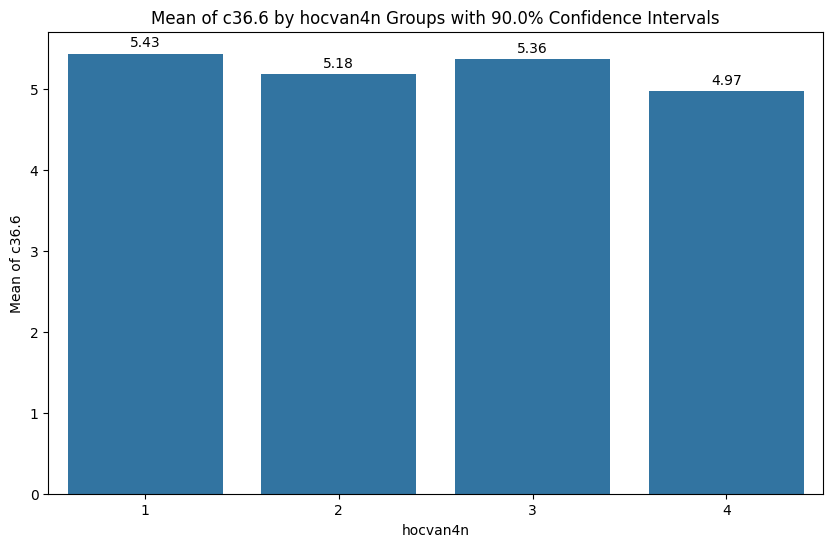

In [25]:
# Perform one-way ANOVA
formula = 'x ~ C(y)'
# Fit the model
model = ols(formula, data=df).fit()
# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# model = ols('x ~ C(y)', data=df).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)

# Descriptive statistics
descriptives = df.groupby(f'{y.name}')[f'{x.name}'].agg(['count', 'mean', 'std', 'min', 'max']).reset_index()
descriptives['std_err'] = descriptives['std'] / descriptives['count']**0.5
descriptives[f'{round(confidence_interval*100,0)}% CI Lower'] = descriptives['mean'] - z_value * descriptives['std_err']
descriptives[f'{round(confidence_interval*100,0)}% CI Upper'] = descriptives['mean'] + z_value * descriptives['std_err']
print('Descriptive Statistics:')
print(descriptives)

# Levene's Test for Homogeneity of Variances
levene_stat, levene_p = levene(*[group[f'{x.name}'].values for name, group in df.groupby(f'{y.name}')])
homogeneity_of_variances = pd.DataFrame({
  'Test': ["Levene's Statistic"],
  'Statistic': [levene_stat],
  'p-value': [levene_p],
  'alpha': [alpha],
  'Result': ['Reject the null hypothesis (variances are not equal)' if levene_p <= alpha else 'Fail to reject the null hypothesis (variances are equal)']
})
print('Homogeneity of Variances:')
print(homogeneity_of_variances)

# ANOVA table
anova_results = pd.DataFrame({
  'Source': ['Between Groups', 'Within Groups'],
  'Sum of Squares': [anova_table['sum_sq'][0], anova_table['sum_sq'][1]],
  'df': [anova_table['df'][0], anova_table['df'][1]],
  'Mean Square': [anova_table['sum_sq'][0] / anova_table['df'][0], anova_table['sum_sq'][1] / anova_table['df'][1]],
  'F': [anova_table['F'][0], None],
  'Sig.': [anova_table['PR(>F)'][0], None]
})
# Print the ANOVA table to inspect its structure
print('One-way ANOVA Test:')
print(anova_results)

# Welch's ANOVA
welch_anova = pg.welch_anova(dv=f'{x.name}', between=f'{y.name}', data=data)
p_value_welch = welch_anova['p-unc'].values[0]
# Điều chỉnh giá trị p bằng Bonferroni
welch_anova['p-corr'] = pg.multicomp(welch_anova['p-unc'].values, method='bonferroni')[1]

# Test the p-value
if levene_p < alpha and p_value_welch < alpha:
  hypothesis_testing = pd.DataFrame({
    'Result': [f'Reject the null hypothesis (p-value <= {alpha}). There is a significant difference between the means of the groups.']
  })
  print(f'Reject the null hypothesis (p-value <= {alpha}). There is a significant difference between the means of the groups.')
elif levene_p < alpha and p_value_welch >= alpha:
  hypothesis_testing = pd.DataFrame({
    'Result': [f'Fail to reject the null hypothesis (p-value > {alpha}). There is no significant difference between the means of the groups.']
  })
  print(f'Fail to reject the null hypothesis (p-value > {alpha}). There is no significant difference between the means of the groups.')
elif levene_p >= alpha and p_value < alpha:
  hypothesis_testing = pd.DataFrame({
    'Result': [f'Reject the null hypothesis (p-value <= {alpha}). There is a significant difference between the means of the groups.']
  })
  print(f'Reject the null hypothesis (p-value <= {alpha}). There is a significant difference between the means of the groups.')
else:
  hypothesis_testing = pd.DataFrame({
    'Result': [f'Fail to reject the null hypothesis (p-value > {alpha}). There is no significant difference between the means of the groups.']
  })
  print(f'Fail to reject the null hypothesis (p-value > {alpha}). There is no significant difference between the means of the groups.')

# Create a bar plot for the means of the groups
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=f'{y.name}', y='mean', data=descriptives, ci=None)

# Add labels and title
plt.xlabel(f'{y.name}')
plt.ylabel(f'Mean of {x.name}')
plt.title(f'Mean of {x.name} by {y.name} Groups with {round(confidence_interval*100,0)}% Confidence Intervals')

# Annotate each bar with the mean value
for index, row in descriptives.iterrows():
  bar_plot.annotate(f'{row["mean"]:.2f}',
            xy=(index, row['mean']),
            xytext=(0, 3),
            textcoords='offset points',
            ha='center',
            va='bottom')

# Save the plot as an image file
plt.savefig('bar_plot_1_way_anova.png')

# Show the plot
plt.show()

# Save the results to an Excel file
with pd.ExcelWriter('one_way_anova_results.xlsx') as writer:
  descriptives.to_excel(writer, sheet_name='Descriptives', index=False)
  homogeneity_of_variances.to_excel(writer, sheet_name='Levene’s Test', index=False)
  anova_results.to_excel(writer, sheet_name='ANOVA', index=False)
  welch_anova.to_excel(writer, sheet_name='Welch One-Way ANOVA', index=False)
  hypothesis_testing.to_excel(writer, sheet_name='Hypothesis Testing', index=False)

  # Access the XlsxWriter workbook and worksheet objects
  workbook  = writer.book
  worksheet = workbook.add_worksheet('Means Plot Chart')

  # Insert the image into the worksheet
  worksheet.insert_image('A1', 'bar_plot_1_way_anova.png')

**Kruskal-Wallis Test**

In [26]:
# Perform Kruskal-Wallis H-test
kruskal_stat, kruskal_p = kruskal(*[group[f'{x.name}'].values for name, group in df.groupby(f'{y.name}')])

# Descriptive statistics
descriptive_stats = df.groupby(f'{y.name}')[f'{x.name}'].agg(['count', 'mean', 'std', 'min', 'max']).reset_index()
descriptive_stats['std_err'] = descriptive_stats['std'] / descriptive_stats['count']**0.5
descriptive_stats[f'{round(confidence_interval*100)}% CI Lower'] = descriptive_stats['mean'] - z_value * descriptive_stats['std_err']
descriptive_stats[f'{round(confidence_interval*100)}% CI Upper'] = descriptive_stats['mean'] + z_value * descriptive_stats['std_err']
print('Descriptive Statistics:')
print(descriptive_stats)

# Ranks
ranks = df[[f'{y.name}', f'{x.name}']].copy()
ranks['rank'] = ranks[f'{x.name}'].rank()
ranks_summary = ranks.groupby(f'{y.name}').agg(
  N=(f'{y.name}', 'size'),
  Mean_Rank=('rank', 'mean'),
  Sum_of_Ranks=('rank', 'sum')
).reset_index()
print('Ranks:')
print(ranks_summary)

# Test statistics
test_statistics = pd.DataFrame({
  'Kruskal-Wallis H': [kruskal_stat],
  'p-value': [kruskal_p],
  'alpha': [alpha],
  'Result': ['Reject the null hypothesis (p-value <= alpha)' if kruskal_p <= alpha else 'Fail to reject the null hypothesis (p-value > alpha)']
})
print('Kruskal-Wallis Test Results:')
print(test_statistics)

if kruskal_p <= alpha:
  hypothesis_testing = pd.DataFrame({
    'Result': [f'Reject the null hypothesis (p-value <= {alpha}). There is a significant difference between the means of the groups.']
  })
  print(f'Reject the null hypothesis (p-value <= {alpha}). There is a significant difference between the means of the groups.')
else:
  hypothesis_testing = pd.DataFrame({
    'Result': [f'Fail to reject the null hypothesis (p-value > {alpha}). There is no significant difference between the means of the groups.']
  })
  print(f'Fail to reject the null hypothesis (p-value > {alpha}). There is no significant difference between the means of the groups.')

# Save the results to an Excel file
with pd.ExcelWriter('one_way_anova_kruskal_wallis_test_results.xlsx') as writer:
  descriptive_stats.to_excel(writer, sheet_name='Descriptive Statistics', index=False)
  ranks_summary.to_excel(writer, sheet_name='Ranks', index=False)
  test_statistics.to_excel(writer, sheet_name='Test Statistics', index=False)
  hypothesis_testing.to_excel(writer, sheet_name='Hypothesis Testing', index=False)

print('Read file one_way_anova_kruskal_wallis_test_results.xlsx')

Descriptive Statistics:
   hocvan4n  count      mean       std  min  max   std_err  90% CI Lower  \
0         1     60  5.433333  1.293618    2    7  0.167005      5.158634   
1         2    215  5.181395  1.390767    1    7  0.094849      5.025382   
2         3     91  5.362637  1.501973    2    7  0.157450      5.103656   
3         4    134  4.970149  1.392463    1    7  0.120290      4.772289   

   90% CI Upper  
0      5.708033  
1      5.337409  
2      5.621619  
3      5.168009  
Ranks:
   hocvan4n    N   Mean_Rank  Sum_of_Ranks
0         1   60  274.058333       16443.5
1         2  215  249.697674       53685.0
2         3   91  270.010989       24571.0
3         4  134  227.988806       30550.5
Kruskal-Wallis Test Results:
   Kruskal-Wallis H   p-value  alpha  \
0           6.83138  0.077471    0.1   

                                          Result  
0  Reject the null hypothesis (p-value <= alpha)  
Reject the null hypothesis (p-value <= 0.1). There is a significant dif

**Dunn's Test**
- Tìm điểm khác biệt của các yếu tố

In [27]:
# Function to perform Dunn's Test
def dunn_test(x, y, alpha=0.05):
  # Rank the data
  ranked_data = rankdata(x)

  # Get unique groups
  groups = np.unique(y)

  # Calculate the sum of ranks for each group
  sum_ranks = {group: np.sum(ranked_data[y == group]) for group in groups}

  # Calculate the number of observations for each group
  n = {group: np.sum(y == group) for group in groups}

  # Calculate the total number of observations
  N = len(x)

  # Calculate the mean rank for each group
  mean_ranks = {group: sum_ranks[group] / n[group] for group in groups}

  # Calculate the overall mean rank
  overall_mean_rank = np.mean(ranked_data)

  # Calculate the test statistic for each pair of groups
  test_statistics = {}
  for i, group1 in enumerate(groups):
    for group2 in groups[i+1:]:
      test_stat = (mean_ranks[group1] - mean_ranks[group2]) / np.sqrt((N * (N + 1)) / 12 * (1 / n[group1] + 1 / n[group2]))
      test_statistics[(group1, group2)] = test_stat

  # Calculate the p-values for each pair of groups
  p_values = {pair: 2 * (1 - norm.cdf(np.abs(test_stat))) for pair, test_stat in test_statistics.items()}

  # Apply Bonferroni correction
  corrected_p_values = {pair: min(p * len(p_values), 1) for pair, p in p_values.items()}

  # Determine if the null hypothesis is rejected for each pair of groups
  reject_null = {pair: p <= alpha for pair, p in p_values.items()}

  # Create a DataFrame to store the results
  dunn_test_results = pd.DataFrame({
    'Group1': [pair[0] for pair in test_statistics.keys()],
    'Group2': [pair[1] for pair in test_statistics.keys()],
    'Test Statistic': list(test_statistics.values()),
    'p-value': list(p_values.values()),
    'Corrected p-value': list(corrected_p_values.values()),
    'Reject': list(reject_null.values())
  })

  return dunn_test_results

# Perform Dunn's Test
dunn_test_results = dunn_test(x, y, alpha=alpha)

# Print the results
print('Dunn\'s Test Results:')
print(dunn_test_results)

# Check which groups have a significant difference
significant_results = dunn_test_results[dunn_test_results['Reject'] == True]

# Print the significant groups
if not significant_results.empty:
  tukey_conclusion = pd.DataFrame({
    'Significant Groups': [significant_results]
  })
  print("Significant groups found:")
  print(significant_results)
else:
  tukey_conclusion = pd.DataFrame({
    'Conclusion': ['No significant groups found. There is no significant difference between the groups.']
  })
  print("No significant groups found. There is no significant difference between the groups.")

# Save the results to an Excel file
with pd.ExcelWriter('one_way_anova_dunn_test_results.xlsx') as writer:
  dunn_test_results.to_excel(writer, sheet_name='Dunn\'s Test Results', index=False)
  significant_results.to_excel(writer, sheet_name='Conclusion', index=False)

print('Read file one_way_anova_dunn_test_results.xlsx')

Dunn's Test Results:
   Group1  Group2  Test Statistic   p-value  Corrected p-value  Reject
0       1       2        1.154793  0.248175           1.000000   False
1       1       3        0.168448  0.866231           1.000000   False
2       1       4        2.052710  0.040101           0.240604    True
3       2       3       -1.124208  0.260925           1.000000   False
4       2       4        1.365158  0.172203           1.000000   False
5       3       4        2.141151  0.032262           0.193571    True
Significant groups found:
   Group1  Group2  Test Statistic   p-value  Corrected p-value  Reject
2       1       4        2.052710  0.040101           0.240604    True
5       3       4        2.141151  0.032262           0.193571    True
Read file one_way_anova_dunn_test_results.xlsx


**Tukey Test**
- Tìm điểm khác biệt của các yếu tố

In [28]:
# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=x, groups=y, alpha=alpha)

# Convert the result to a DataFrame for better readability
tukey_result_df = pd.DataFrame(data=tukey_result.summary().data[1:], columns=tukey_result.summary().data[0])
print('Tukey Test Result:')
print(tukey_result)

# Check which groups have a significant difference
significant_groups = tukey_result_df[tukey_result_df['p-adj'] == True]

# Print the significant groups
if not significant_groups.empty:
  tukey_conclusion = pd.DataFrame({
    'Significant Groups': [significant_groups]
  })
  print(significant_groups)
  print("Significant groups found:")
else:
  tukey_conclusion = pd.DataFrame({
    'Conclusion': ['No significant groups found. There is no significant difference between the groups.']
  })
  print("No significant groups found. There is no significant difference between the groups.")

# Save the results to an Excel file
with pd.ExcelWriter('one_way_anova_tukey_hsd_test_results.xlsx') as writer:
  tukey_result_df.to_excel(writer, sheet_name='Tukey HSD Test Results', index=False)
  tukey_conclusion.to_excel(writer, sheet_name='Conclusion', index=False)

print('Read file one_way_anova_tukey_hsd_test_results.xlsx')

Tukey Test Result:
Multiple Comparison of Means - Tukey HSD, FWER=0.10
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.2519  0.607 -0.7219  0.218  False
     1      3  -0.0707 0.9903  -0.606 0.4646  False
     1      4  -0.4632 0.1455 -0.9632 0.0368  False
     2      3   0.1812 0.7293 -0.2213 0.5838  False
     2      4  -0.2112 0.5189 -0.5655  0.143  False
     3      4  -0.3925  0.167 -0.8297 0.0447  False
---------------------------------------------------
No significant groups found. There is no significant difference between the groups.
Read file one_way_anova_tukey_hsd_test_results.xlsx


# 7.6 Two - Way ANOVA
n biến định tính, 1 biến định lượng. So sánh trị trung bình của n nhóm tổng thể riêng biệt trong 1 biến định tính.

Kiểm định ảnh hưởng của mức độ yêu thích ngành học - yeuthich (thang đo 3 - Thang đo thứ bậc) & thời gian tự học - tuhoc (thang đo 3 - Thang đo thứ bậc) đến kết quả học tập của sinh viên - diemtb.

**Các giả thiết H0**
- Điểm trung bình học tập (ĐTB) của sinh viên có thời gian tự học (TGTH) khác nhau đều bằng nhau.
- Điểm trung bình học tập (ĐTB) của sinh viên có mức độ yêu thích ngành (MĐYTN) đang học khác nhau đều bằng nhau.
- Không có ảnh hưởng tương tác giữa TGTH và MĐYTN --> Ảnh hưởng của các nhóm trong TGTH và MĐYTN đến ĐTB là như nhau.

In [30]:
# File path to your .sav file
file_path = "/content/drive/My Drive/Data Analytics/SPSS Book/Data SPSS/Phan tich phuong sai 2 yeu to.csv"

# Read the SPSS file
df_diemtb = pd.read_csv(file_path)

**Input Test Value**

In [31]:
# Input data
data = df_diemtb
y = data['diemtb'] #quantitative data dependent variable
x1 = data['yeuthich'] #qualitative data factor
x2 = data['tuhoc'] #qualitative data factor
confidence_interval = 0.95
z_value = norm.ppf((1 + confidence_interval) / 2)
alpha = round(1 - confidence_interval, 3)

**Kolmogorov-Smirnow test to see if the data is normally distributed:**
- If the data is normal distribution, use Independent Samples T-Test.
- If the data is not normal distribution, use Mann-Whitney test.

In [32]:
# Perform the Kolmogorov-Smirnov test for normality on 'diemtb'
ks_statistic, p_value = kstest(y, 'norm', args=(y.mean(), y.std()))

# Create the Kolmogorov-Smirnov test results table
ks_test_results = pd.DataFrame({
  'Variable': ['diemtb'],
  'KS Statistic': [ks_statistic],
  'p-value': [p_value],
  'alpha': [alpha],
  'Result': ['Reject the null hypothesis (data does not follow normal distribution)' if p_value <= alpha else 'Fail to reject the null hypothesis (data follows normal distribution)']
})

print('Kolmogorov-Smirnov Test Results:')
print(ks_test_results)

# Print the results
if p_value <= alpha:
  print('Reject the null hypothesis (data does not follow normal distribution - Use Kruskal-Wallis)')
else:
  print('Fail to reject the null hypothesis (data follows normal distribution - Use Two-Way Anova)')

# Save the results to an Excel file
ks_test_results.to_excel('two_way_anova_ks_test_results.xlsx', sheet_name='KS Test Results', index=False)

print('Read file two_way_anova_ks_test_results.xlsx')

Kolmogorov-Smirnov Test Results:
  Variable  KS Statistic   p-value  alpha  \
0   diemtb      0.099884  0.523373   0.05   

                                              Result  
0  Fail to reject the null hypothesis (data follo...  
Fail to reject the null hypothesis (data follows normal distribution - Use Two-Way Anova)
Read file two_way_anova_ks_test_results.xlsx


**Two - Way ANOVA**

In [ ]:
# Create a formula for the two-way ANOVA
formula = 'y ~ C(x1) + C(x2) + C(x1):C(x2)'
# Fit the model
model = ols(formula, data=data).fit()
# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
# Add 'reject' column to anova_table
anova_table['reject'] = anova_table['PR(>F)'] < alpha

# Between-Subjects Factors
between_subjects_factors = data.groupby([f'{x1.name}', f'{x2.name}']).size().reset_index(name='N')
print('Between-Subjects Factors:')
print(between_subjects_factors)

# Descriptive statistics
descriptive_stats = data.groupby([f'{x1.name}', f'{x2.name}']).agg(
  count=(f'{y.name}', 'size'),
  mean=(f'{y.name}', 'mean'),
  std=(f'{y.name}', 'std')
).reset_index()
descriptive_stats['std_err'] = descriptive_stats['std'] / np.sqrt(descriptive_stats['count'])
print('Descriptive Statistics:')
print(descriptive_stats)

# Levene's Test for Equality of Error Variances
levene_stat, levene_p = levene(data[f'{y.name}'], data[f'{x1.name}'], data[f'{x2.name}'])
levene_test_results = pd.DataFrame({
  'Test': ["Levene's Statistic"],
  'Statistic': [levene_stat],
  'p-value': [levene_p],
  'alpha': [alpha],
  'Result': ['Reject the null hypothesis (variances are not equal)' if levene_p <= alpha else 'Fail to reject the null hypothesis (variances are equal)']
})
print("Levene's Test of Equality of Error Variances:")
print(levene_test_results)

# Print the ANOVA table
print('Two-Way ANOVA Results:')
print(anova_table)

# Sử dụng Mixed-effects Model
mixed_model = smf.mixedlm(f'{y.name} ~ {x1.name} * {x2.name}', data, groups=data[f'{x2.name}'])
mixed_fit = mixed_model.fit()
print(mixed_fit.summary())
# Extract the summary table from mixed_fit
mixed_fit_df = mixed_fit.summary().tables[1]
# Replace empty strings with NaN and then convert to float
mixed_fit_df['P>|z|'] = mixed_fit_df['P>|z|'].replace('', np.nan).astype(float)
# Add a new column 'reject' based on the condition
mixed_fit_df['reject'] = mixed_fit_df['P>|z|'] < alpha

# Test the p-value
if levene_p < alpha:
  hypothesis_testing = pd.DataFrame({
    'Chose Test': [f'Mixed Fit Test']
  })
  print('Chose Mixed Fit Test')
else:
  hypothesis_testing = pd.DataFrame({
    'Chose Test': [f'Two-Way ANOVA Test']
  })
  print('Chose Two-Way ANOVA Test')

# Save the results to an Excel file
with pd.ExcelWriter('two_way_anova_results.xlsx') as writer:
  between_subjects_factors.to_excel(writer, sheet_name='Between-Subjects Factors', index=False)
  descriptive_stats.to_excel(writer, sheet_name='Descriptive Statistics', index=False)
  levene_test_results.to_excel(writer, sheet_name="Levene's Test", index=False)
  anova_table.to_excel(writer, sheet_name='Two-way ANOVA Test', index=True)
  mixed_fit_df.to_excel(writer, sheet_name='Mixed Fit Test', index=True)
  hypothesis_testing.to_excel(writer, sheet_name='Hypothesis Testing', index=False)
print('Read file two_way_anova_results.xlsx')

Between-Subjects Factors:
   yeuthich  tuhoc  N
0         1      1  7
1         1      2  7
2         1      3  7
3         2      1  7
4         2      2  7
5         2      3  7
6         3      1  7
7         3      2  7
8         3      3  7
Descriptive Statistics:
   yeuthich  tuhoc  count      mean       std   std_err
0         1      1      7  5.614286  0.384831  0.145453
1         1      2      7  6.042857  0.263674  0.099659
2         1      3      7  6.128571  0.292770  0.110657
3         2      1      7  5.757143  0.359894  0.136027
4         2      2      7  6.400000  0.294392  0.111270
5         2      3      7  6.914286  0.254484  0.096186
6         3      1      7  5.728571  0.515475  0.194831
7         3      2      7  6.757143  0.373529  0.141181
8         3      3      7  7.357143  0.359894  0.136027
Levene's Test of Equality of Error Variances:
                 Test  Statistic   p-value  alpha  \
0  Levene's Statistic   1.957723  0.144078   0.05   

                 

/Users/tanhpuh/Documents/GitHub/codev2/.venv/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


**Kruskal-Wallis Test**

In [33]:
# Perform Kruskal-Wallis H-test
kruskal_stat, kruskal_p = kruskal(*[group[f'{y.name}'].values for name, group in data.groupby([f'{x1.name}', f'{x2.name}'])])

# Descriptive statistics
descriptive_stats = data.groupby([f'{x1.name}', f'{x2.name}']).agg(
  count=(f'{y.name}', 'size'),
  mean=(f'{y.name}', 'mean'),
  std=(f'{y.name}', 'std')
).reset_index()
descriptive_stats['std_err'] = descriptive_stats['std'] / descriptive_stats['count']**0.5
descriptive_stats[f'{round(confidence_interval*100)}% CI Lower'] = descriptive_stats['mean'] - z_value * descriptive_stats['std_err']
descriptive_stats[f'{round(confidence_interval*100)}% CI Upper'] = descriptive_stats['mean'] + z_value * descriptive_stats['std_err']
print('Descriptive Statistics:')
print(descriptive_stats)

# Ranks
ranks = data[[f'{x1.name}', f'{x2.name}', f'{y.name}']].copy()
ranks['rank'] = ranks[f'{y.name}'].rank()
ranks_summary = ranks.groupby([f'{x1.name}', f'{x2.name}']).agg(
  N=(f'{y.name}', 'size'),
  Mean_Rank=('rank', 'mean'),
  Sum_of_Ranks=('rank', 'sum')
).reset_index()
print('Ranks:')
print(ranks_summary)

# Test statistics
test_statistics = pd.DataFrame({
  'Kruskal-Wallis H': [kruskal_stat],
  'p-value': [kruskal_p],
  'alpha': [alpha],
  'Result': ['Reject the null hypothesis (p-value <= alpha)' if kruskal_p <= alpha else 'Fail to reject the null hypothesis (p-value > alpha)']
})
print('Kruskal-Wallis Test Results:')
print(test_statistics)

if kruskal_p <= alpha:
  hypothesis_testing = pd.DataFrame({
    'Result': [f'Reject the null hypothesis (p-value <= {alpha}). There is a significant difference between the means of the groups.']
  })
  print(f'Reject the null hypothesis (p-value <= {alpha}). There is a significant difference between the means of the groups.')
else:
  hypothesis_testing = pd.DataFrame({
    'Result': [f'Fail to reject the null hypothesis (p-value > {alpha}). There is no significant difference between the means of the groups.']
  })
  print(f'Fail to reject the null hypothesis (p-value > {alpha}). There is no significant difference between the means of the groups.')

# Save the results to an Excel file
with pd.ExcelWriter('two_way_anova_kruskal_wallis_test_results.xlsx') as writer:
  descriptive_stats.to_excel(writer, sheet_name='Descriptive Statistics', index=False)
  ranks_summary.to_excel(writer, sheet_name='Ranks', index=False)
  test_statistics.to_excel(writer, sheet_name='Test Statistics', index=False)
  hypothesis_testing.to_excel(writer, sheet_name='Hypothesis Testing', index=False)

print('Read file two_way_anova_kruskal_wallis_test_results.xlsx')

Descriptive Statistics:
   yeuthich  tuhoc  count      mean       std   std_err  95% CI Lower  \
0         1      1      7  5.614286  0.384831  0.145453      5.329204   
1         1      2      7  6.042857  0.263674  0.099659      5.847529   
2         1      3      7  6.128571  0.292770  0.110657      5.911688   
3         2      1      7  5.757143  0.359894  0.136027      5.490534   
4         2      2      7  6.400000  0.294392  0.111270      6.181915   
5         2      3      7  6.914286  0.254484  0.096186      6.725765   
6         3      1      7  5.728571  0.515475  0.194831      5.346709   
7         3      2      7  6.757143  0.373529  0.141181      6.480434   
8         3      3      7  7.357143  0.359894  0.136027      7.090534   

   95% CI Upper  
0      5.899368  
1      6.238186  
2      6.345455  
3      6.023751  
4      6.618085  
5      7.102806  
6      6.110433  
7      7.033852  
8      7.623751  
Ranks:
   yeuthich  tuhoc  N  Mean_Rank  Sum_of_Ranks
0         1

**Tukey Test**
- Tìm điểm khác biệt của các yếu tố

In [34]:
# Perform Tukey's HSD test for each variable
tukey_result_1 = pairwise_tukeyhsd(endog=y, groups=x1, alpha=alpha)
tukey_result_2 = pairwise_tukeyhsd(endog=y, groups=x2, alpha=alpha)

# Convert the results to DataFrames for better readability
tukey_result_1_df = pd.DataFrame(data=tukey_result_1.summary().data[1:], columns=tukey_result_1.summary().data[0])
tukey_result_2_df = pd.DataFrame(data=tukey_result_2.summary().data[1:], columns=tukey_result_2.summary().data[0])

# Print the results
print('Tukey Test Result for yeuthich:')
print(tukey_result_1_df)
print('Tukey Test Result for tuhoc:')
print(tukey_result_1_df)

# Save the results to an Excel file
with pd.ExcelWriter('two_way_anova_tukey_hsd_test_results.xlsx') as writer:
  tukey_result_1_df.to_excel(writer, sheet_name=f'Tukey HSD Test Results {x1.name}', index=False)
  tukey_result_2_df.to_excel(writer, sheet_name=f'Tukey HSD Test Results {x2.name}', index=False)

print('Read file two_way_anova_tukey_hsd_test_results.xlsx')

Tukey Test Result for yeuthich:
   group1  group2  meandiff   p-adj   lower   upper  reject
0       1       2    0.4286  0.0643 -0.0203  0.8775   False
1       1       3    0.6857  0.0015  0.2368  1.1346    True
2       2       3    0.2571  0.3595 -0.1917  0.7060   False
Tukey Test Result for tuhoc:
   group1  group2  meandiff   p-adj   lower   upper  reject
0       1       2    0.4286  0.0643 -0.0203  0.8775   False
1       1       3    0.6857  0.0015  0.2368  1.1346    True
2       2       3    0.2571  0.3595 -0.1917  0.7060   False
Read file two_way_anova_tukey_hsd_test_results.xlsx


**Summary for Groups of Cases**

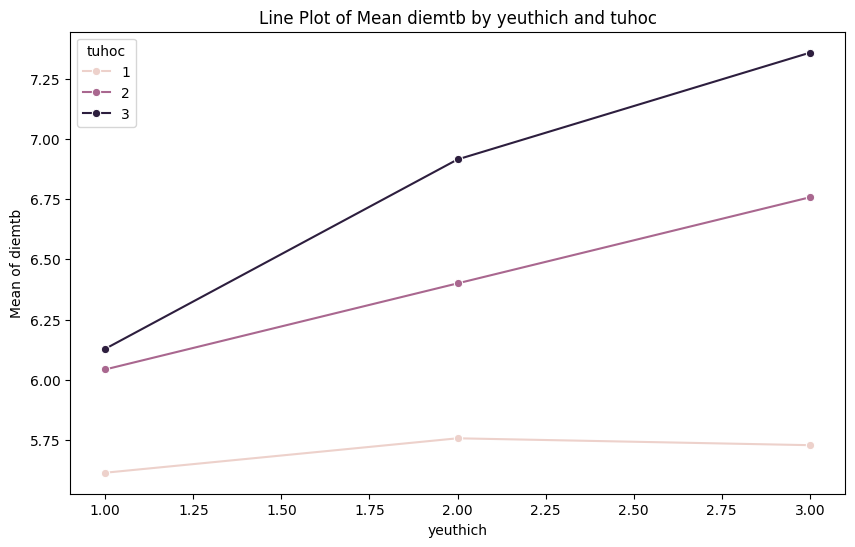

Read file two_way_anova_tukey_hsd_test_results.xlsx


In [35]:
# Calculate the mean of diemtb grouped by x1 and x2
mean_diemtb = data.groupby([f'{x1.name}', f'{x2.name}'])[f'{y.name}'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_diemtb, x=f'{x1.name}', y=f'{y.name}', hue=f'{x2.name}', marker='o')

# Add labels and title
plt.xlabel(f'{x1.name}')
plt.ylabel(f'Mean of {y.name}')
plt.title(f'Line Plot of Mean {y.name} by {x1.name} and {x2.name}')

# Save the plot as an image file
plt.savefig('bar_plot_2_way_anova.png')

# Show the plot
plt.show()

# Save the plot into the existing Excel file
with pd.ExcelWriter('two_way_anova_tukey_hsd_test_results.xlsx', engine='openpyxl', mode='a') as writer:
  # Access the openpyxl workbook and worksheet objects
  workbook  = writer.book
  worksheet = workbook.create_sheet('Means Plot Chart')

  # Insert the image into the worksheet
  img = Image('bar_plot_2_way_anova.png')
  worksheet.add_image(img, 'A1')

print('Read file two_way_anova_tukey_hsd_test_results.xlsx')